In [2]:
%matplotlib inline

## Following the procedure that Herschel helpdesk suggests

In [27]:
name = 'tophat21'

In [28]:
# for bhr71 calibration 
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns

irs = ascii.read('/Users/yaolun/bhr71/data/bhr71_spitzer_irs.txt',data_start=2, names=['Wavelength','Flux','Uncertainty'])
pacs_b1 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b1_'+name+'.txt', data_start=4)
pacs_b2 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b2_'+name+'.txt', data_start=4)
pacs_r1 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r1_'+name+'.txt', data_start=4)
pacs_r2 = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r2_'+name+'.txt', data_start=4)
spire = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100_'+name+'.txt', data_start=4)

# PACS data from CDF archive
pacs_cdf = ascii.read('/Users/yaolun/data/CDF_archive/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt')
# sum over 25 spaxels
pacs_5x5 = ascii.read('/Users/yaolun/test/BHR71_pacs_summed_5x5_os8_sf7.txt', names=['Wavelength','Flux'])

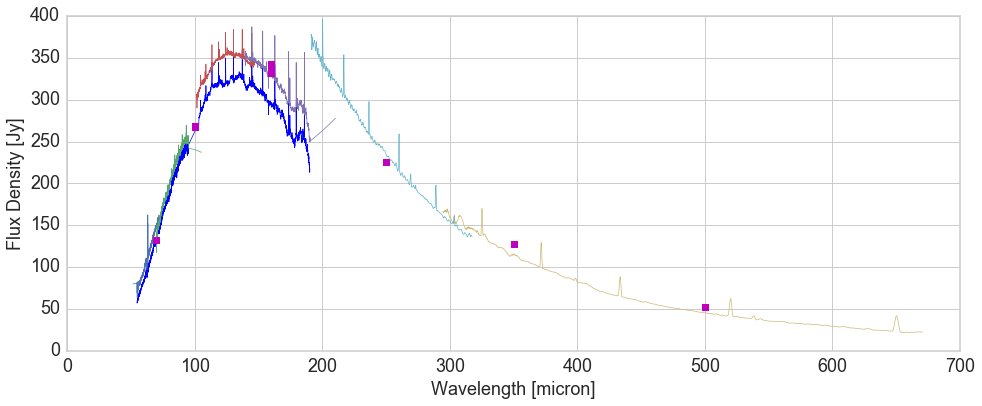

In [29]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
sns.set_style("whitegrid")
# sns.choose_cubehelix_palette()
# PACS CDF
ax.plot(pacs_cdf['Wavelength(um)'], pacs_cdf['Flux_Density(Jy)'], color='b', linewidth=0.7)

# ax.plot(irs['Wavelength'], irs['Flux'], linewidth=0.7)
ax.plot(pacs_b1['wave_0'], pacs_b1['flux_0'], linewidth=0.7)
ax.plot(pacs_b2['wave_0'], pacs_b2['flux_0'], linewidth=0.7)
ax.plot(pacs_r1['wave_0'], pacs_r1['flux_0'], linewidth=0.7)
ax.plot(pacs_r2['wave_0'], pacs_r2['flux_0'], linewidth=0.7)
ax.plot(spire['wave_segm1_0'], spire['flux_segm1_0'], linewidth=0.7)
ax.plot(spire['wave_segm2_0'], spire['flux_segm2_0'], linewidth=0.7)

# ax.plot(pacs_5x5['Wavelength'], pacs_5x5['Flux'], linewidth=0.7)

# put in photometry
ax.plot([70,70,100,100,
         160,160,160,160,250,350,500],
        [132.62,132.91,267.24,268.87,338.41,331.69,341.70,342.69,225.14,127.13,52.92],
        marker='s', color='m', linestyle='None')

# photometry measured within a 100" radius aperture
# [132.62,132.91,267.24,268.87,338.41,331.69,341.70,342.69,225.14,127.13,52.92]

# photometry measured within 53" diameter aperture
# [128.19,127.44,251.75,253.00,284.50,283.62,284.50,287.23,174.43,88.61,30.60]

# ax.set_yscale('log')
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
# ax.set_ylim([-10, 550])

fig.savefig('/Users/yaolun/bhr71/calibration_testing/semi-extended_correction_'+name+'.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

### Test the effect of $\tt{gaussRefBeamDiam}$

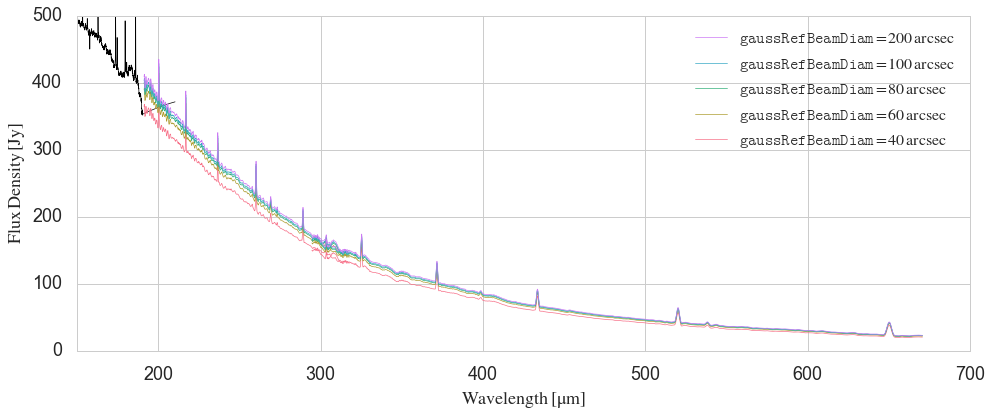

In [36]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
spire = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_100.txt', data_start=4)

# other diameters
# 40"
spire40 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_40.txt', data_start=4)
# 60"
spire60 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_60.txt', data_start=4)
# 80"
spire80 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_80.txt', data_start=4)
# 120"
spire120 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_120.txt', data_start=4)
# 200"
spire200 = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_200.txt', data_start=4)

colorlist = sns.color_palette("husl",5)
# colorlist = ['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']

# plot
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

ax.plot(pacs_b1['wave_0'], pacs_b1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_b2['wave_0'], pacs_b2['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r1['wave_0'], pacs_r1['flux_0'], linewidth=0.7, color='k')
ax.plot(pacs_r2['wave_0'], pacs_r2['flux_0'], linewidth=0.7, color='k')


diam40, = ax.plot(spire40['wave_segm1_0'], spire40['flux_segm1_0'], linewidth=0.7, color=colorlist[0])
ax.plot(spire40['wave_segm2_0'], spire40['flux_segm2_0'], linewidth=0.7, color=colorlist[0])

diam60, = ax.plot(spire60['wave_segm1_0'], spire60['flux_segm1_0'], linewidth=0.7, color=colorlist[1])
ax.plot(spire60['wave_segm2_0'], spire60['flux_segm2_0'], linewidth=0.7, color=colorlist[1])

diam80, = ax.plot(spire80['wave_segm1_0'], spire80['flux_segm1_0'], linewidth=0.7, color=colorlist[2])
ax.plot(spire80['wave_segm2_0'], spire80['flux_segm2_0'], linewidth=0.7, color=colorlist[2])

diam100, = ax.plot(spire['wave_0'], spire['flux_0'], linewidth=0.7, color=colorlist[3])
ax.plot(spire['wave_1'], spire['flux_1'], linewidth=0.7, color=colorlist[3])

# diam120, = ax.plot(spire120['wave_segm1_0'], spire120['flux_segm1_0'], linewidth=0.7, color=colorlist[4])
# ax.plot(spire120['wave_segm2_0'], spire120['flux_segm2_0'], linewidth=0.7, color=colorlist[4])

diam200, = ax.plot(spire200['wave_segm1_0'], spire200['flux_segm1_0'], linewidth=0.7, color=colorlist[4])
ax.plot(spire200['wave_segm2_0'], spire200['flux_segm2_0'], linewidth=0.7, color=colorlist[4])


ax.legend([diam200, diam100, diam80, diam60, diam40],
          [r'$\tt{gaussRefBeamDiam}=\rm{200\,arcsec}$',
#            r'$\tt{gaussRefBeamDiam}=\rm{120\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{100\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{80\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{60\,arcsec}$',
           r'$\tt{gaussRefBeamDiam}=\rm{40\,arcsec}$'],
          loc='best', fontsize=16, numpoints=1)
# [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on() 
ax.tick_params('both',labelsize=18,which='major',pad=15)
ax.tick_params('both',labelsize=18,which='minor',pad=15)
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)

ax.set_xlim([150,700])
ax.set_ylim([0,500])
fig.savefig('/Users/yaolun/bhr71/calibration_testing/sect_gaussbeam_test.pdf',
            format='pdf', dpi=300, bbox_inches='tight')